#                            **PRICE PREDICTION - ML FOUNDATION**

---
<a name = Section1></a>
# **1. Introduction**
---



SWIPECAR, is an American company that buys and sells second hand cars.
They initiated their business in the late 80s and have gained huge popularity over the years.
The company clients are local and foreign customers who seek to buy and sell second hand cars.

Current Scenario:

*  Company has started facing loss in business due to the technical advancements.
*   There are several competitors in the market who have been using enhanced techniques.

*   The company is pretty old and they have been using traditional measures to estimate old cars prices.
*   These traditional measures include weight analysis, condition of parts and build year.

*   They are looking for a more robust way to estimate the price of old cars





---
<a name = Section2></a>
# **2. Problem Statement**
---

The current process suffers from the following problems:

*   They have been using manual traditional measures to estimate old cars prices.
*   These measures are time consuming and not accurate.

*   Company is looking for a robust way to estimate the prices of used cars.








  - 

---
<a id = Section3></a>
# **3. Installing & Importing Libraries**
---

- This section is emphasised on installing and importing the necessary libraries that will be required.

### **Installing Libraries**

In [ ]:
!pip install -q datascience                                         # Package that is required by pandas profiling
!pip install -q pandas-profiling                                    # Library to generate basic statistics about data


     |████████████████████████████████| 69 kB 4.5 MB/s 


In [ ]:
!pip install -q --upgrade pandas-profiling                          # Upgrading pandas profiling to the latest version

### **Importing Libraries**



In [1]:
import pandas as pd                                                 # Importing package pandas (For Panel Data Analysis)
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import scipy as sp                                                  # Importing library for scientific calculations

**DATA ACQUISITION**


In [2]:
data = pd.read_csv(filepath_or_buffer = '/content/TrainData.csv')
print('Data Shape:', data.shape)
data.columns

Data Shape: (181, 27)


Index(['ID', 'symboling', 'normalized-losses', 'make', 'fuel-type',
       'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size',
       'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

### **Data Description**

- To get some quick description out of the data you can use describe method defined in pandas library.

In [4]:
data.describe()

,ID,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,91.000000,0.850829,98.729282,174.174033,65.943646,53.709945,2564.165746,127.900552,10.154254,25.132597,30.646409,13271.314917
std,52.394338,1.267045,6.116197,12.336569,2.146114,2.497735,523.489016,42.578438,3.982306,6.418211,6.888545,8106.479635
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,46.000000,0.000000,94.500000,166.800000,64.200000,51.600000,2190.000000,98.000000,8.600000,19.000000,25.000000,7775.000000
50%,91.000000,1.000000,96.900000,173.200000,65.500000,54.100000,2420.000000,120.000000,9.000000,24.000000,30.000000,10295.000000
75%,136.000000,2.000000,102.400000,183.100000,66.600000,55.500000,2935.000000,146.000000,9.400000,30.000000,34.000000,16500.000000
max,181.000000,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


### **Data Information**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 181 non-null    int64  
 1   symboling          181 non-null    int64  
 2   normalized-losses  181 non-null    object 
 3   make               181 non-null    object 
 4   fuel-type          181 non-null    object 
 5   aspiration         181 non-null    object 
 6   num-of-doors       181 non-null    object 
 7   body-style         181 non-null    object 
 8   drive-wheels       181 non-null    object 
 9   engine-location    181 non-null    object 
 10  wheel-base         181 non-null    float64
 11  length             181 non-null    float64
 12  width              181 non-null    float64
 13  height             181 non-null    float64
 14  curb-weight        181 non-null    int64  
 15  engine-type        181 non-null    object 
 16  num-of-cylinders   181 non

---
<a name = Section5></a>
# **5. Data Pre-Profiling**
---

- This section is emphasised on getting a report about the data.

- We need to perform pandas profiling and get some observations out of it...

In [6]:
# profile = ProfileReport(df=data)
 #profile.to_file(output_file='Pre Profiling Report.html')
 #print('Accomplished!')

#from google.colab import files
#files.download('Pre Profiling Report.html')

---
<a name = Section6></a>
# **6. Data Pre-Processing**
---
-From profiling report we inferred that there is no missing or redundant data.

We need to do following data handling processes.

  - Handling inconsistent data,[normalised losses,bore,stroke,horsepower,peak-rpm and price]

  - Handling outliers,

  - Handling typos

In [7]:
df1=data.copy()
df1['normalized-losses'].unique()

array(['65', '188', '?', '161', '103', '118', '145', '89', '153', '91',
       '107', '95', '102', '104', '93', '85', '137', '150', '148', '74',
       '142', '110', '125', '231', '197', '168', '87', '106', '108',
       '134', '115', '164', '128', '154', '121', '158', '94', '83', '81',
       '122', '77', '129', '192', '113', '90', '186', '194', '78', '119',
       '101', '256', '98'], dtype=object)

In [8]:
df1['normalized-losses'].replace('?',int(0),inplace=True)
df1['normalized-losses'].replace(0,df1['normalized-losses'].median(),inplace=True)

In [9]:
df1['normalized-losses']=df1['normalized-losses'].apply(pd.to_numeric)
df1['normalized-losses'].dtype



dtype('float64')

In [10]:
var=df1.columns.unique()
var


Index(['ID', 'symboling', 'normalized-losses', 'make', 'fuel-type',
       'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size',
       'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [11]:
for i in df1:
  print(i)
  print('')
  print(df1[i].unique())
  print('')

ID

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181]

symboling

[-1  0 -2  1  3  2]

normalized-losses

[ 65. 188. 104. 161. 103. 118. 145.  89. 153.  91. 107.  95. 102.  93.
  85. 137. 150. 148.  74. 142. 110. 125. 231. 197. 168.  87. 106. 108.
 134. 115. 164. 128. 154. 121. 158.  94.  83.  81. 122.  77. 129. 

In [12]:
redundantcolumns=['num-of-doors','bore','stroke','horsepower','peak-rpm']

In [13]:
df1['num-of-doors'].mode()

0    four
dtype: object

In [14]:
df1['num-of-doors'].replace('?',0,inplace=True)
df1['num-of-doors'].replace(0,'four',inplace=True)
df1['num-of-doors'].unique()


array(['four', 'two'], dtype=object)

In [15]:
df1['bore'].replace('?',int(0),inplace=True)
df1['bore'].replace(0,df1['bore'].median(),inplace=True)
df1['bore']=df1['bore'].apply(pd.to_numeric)
df1['bore'].unique()

array([3.31, 3.46, 3.7 , 3.78, 3.03, 3.63, 3.74, 3.62, 3.17, 3.27, 3.19,
       3.15, 3.58, 2.91, 3.54, 2.97, 3.35, 3.43, 3.24, 3.6 , 3.05, 3.59,
       3.39, 2.99, 3.33, 3.13, 3.8 , 3.01, 3.5 , 3.34, 3.47, 3.61, 2.68,
       3.94, 2.92, 3.08])

In [16]:
df1['stroke'].replace('?',int(0),inplace=True)
df1['stroke'].replace(0,df1['stroke'].median(),inplace=True)
df1['stroke']=df1['stroke'].apply(pd.to_numeric)
df1['stroke'].unique()

array([3.54, 3.19, 3.9 , 3.52, 3.15, 3.39, 4.17, 2.9 , 2.64, 3.46, 3.35,
       3.4 , 3.58, 3.64, 3.41, 3.07, 3.29, 3.23, 3.1 , 3.27, 3.08, 3.12,
       3.03, 3.86, 3.5 , 3.47, 2.36, 3.11, 2.19, 2.76, 2.8 , 2.68, 3.21,
       2.87])

In [17]:
df1['horsepower'].replace('?',int(0),inplace=True)
df1['horsepower'].replace(0,df1['horsepower'].median(),inplace=True)
df1['horsepower']=df1['horsepower'].apply(pd.to_numeric)
df1['horsepower'].unique()

array([ 92., 121.,  95., 114., 102., 176., 207.,  94., 116.,  56.,  88.,
       100., 111.,  68., 123.,  82.,  58., 160., 135., 110., 162.,  86.,
       155.,  76., 161., 112., 175., 145.,  62., 152.,  70.,  69., 182.,
        84., 115., 101.,  55.,  73.,  97.,  48., 140.,  90., 184., 106.,
        72.,  52., 262.,  85., 142., 154., 134., 156., 143.,  78.,  60.,
       200.,  64.])

In [18]:
df1['horsepower']=df1['horsepower'].apply(pd.to_numeric)
df1['horsepower'].dtype
df1['horsepower'].describe()

count    181.000000
mean     104.066298
std       37.768094
min       48.000000
25%       72.000000
50%       95.000000
75%      116.000000
max      262.000000
Name: horsepower, dtype: float64

In [19]:
df1['peak-rpm'].replace('?',0,inplace=True)
df1['peak-rpm'].replace(0,df1['peak-rpm'].median(),inplace=True)
df1['peak-rpm']=df1['peak-rpm'].apply(pd.to_numeric)
df1['peak-rpm'].unique()

array([4200., 4250., 5100., 4150., 5400., 5500., 4750., 5900., 5200.,
       4500., 4800., 5000., 4350., 6000., 5250., 5800., 6600., 4400.,
       4900., 5300., 5600., 4650.])

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 181 non-null    int64  
 1   symboling          181 non-null    int64  
 2   normalized-losses  181 non-null    float64
 3   make               181 non-null    object 
 4   fuel-type          181 non-null    object 
 5   aspiration         181 non-null    object 
 6   num-of-doors       181 non-null    object 
 7   body-style         181 non-null    object 
 8   drive-wheels       181 non-null    object 
 9   engine-location    181 non-null    object 
 10  wheel-base         181 non-null    float64
 11  length             181 non-null    float64
 12  width              181 non-null    float64
 13  height             181 non-null    float64
 14  curb-weight        181 non-null    int64  
 15  engine-type        181 non-null    object 
 16  num-of-cylinders   181 non

In [21]:
traindf=df1.copy()

In [22]:
df2=pd.read_csv('/content/TestData.csv')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 20 non-null     int64  
 1   symboling          20 non-null     int64  
 2   normalized-losses  20 non-null     object 
 3   make               20 non-null     object 
 4   fuel-type          20 non-null     object 
 5   aspiration         20 non-null     object 
 6   num-of-doors       20 non-null     object 
 7   body-style         20 non-null     object 
 8   drive-wheels       20 non-null     object 
 9   engine-location    20 non-null     object 
 10  wheel-base         20 non-null     float64
 11  length             20 non-null     float64
 12  width              20 non-null     float64
 13  height             20 non-null     float64
 14  curb-weight        20 non-null     int64  
 15  engine-type        20 non-null     object 
 16  num-of-cylinders   20 non-nu

In [23]:
for i in df2:
  print(i)
  print('')
  print(df2[i].unique())
  print('')

ID

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]

symboling

[-2  0 -1  1  2  3]

normalized-losses

['103' '188' '74' '154' '94' '118' '161' '101' '150' '128' '168' '87' '?'
 '192' '91']

make

['volvo' 'bmw' 'plymouth' 'nissan' 'volkswagen' 'mazda' 'peugot' 'honda'
 'mitsubishi' 'saab' 'toyota' 'audi']

fuel-type

['gas' 'diesel']

aspiration

['std' 'turbo']

num-of-doors

['four' 'two']

body-style

['sedan' 'wagon' 'hatchback']

drive-wheels

['rwd' 'fwd']

engine-location

['front']

wheel-base

[104.3 101.2  93.7  94.5  97.3 104.9 107.9  99.1  95.7  99.8 103.5 114.2]

length

[188.8 176.8 167.3 170.2 171.7 175.  186.7 150.  157.3 186.6 165.3 168.7
 158.7 177.3 189.  198.9 166.3]

width

[67.2 64.8 63.8 65.5 66.1 68.4 64.  64.4 66.5 63.6 66.3 66.9]

height

[56.2 54.3 57.5 50.8 53.5 55.7 54.4 56.7 52.6 56.1 54.5 53.1 53. ]

curb-weight

[2912 2765 3157 1989 2037 2319 2670 3020 1956 1944 2707 1918 2204 1985
 2507 3230 2300 3285 2395 2275]

engine-type

['ohc' 'l' 

In [24]:
df2['normalized-losses'].replace('?',int(0),inplace=True)
df2['normalized-losses'].replace(0,df2['normalized-losses'].median(),inplace=True)
df2['normalized-losses']=df2['normalized-losses'].apply(pd.to_numeric)
df2['normalized-losses'].unique()

array([103. , 188. ,  74. , 154. ,  94. , 118. , 161. , 101. , 150. ,
       128. , 168. ,  87. , 110.5, 192. ,  91. ])

In [25]:
df1.duplicated().value_counts()

False    181
dtype: int64

In [26]:
df2.duplicated().value_counts()

False    20
dtype: int64

In [27]:
print(df1.shape)
df1.columns

(181, 27)


Index(['ID', 'symboling', 'normalized-losses', 'make', 'fuel-type',
       'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size',
       'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [28]:
print(df2.shape)
df2.columns

(20, 26)


Index(['ID', 'symboling', 'normalized-losses', 'make', 'fuel-type',
       'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size',
       'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg'],
      dtype='object')

---
<a name = Section7></a>
# **7. Data Post-Profiling**
---



In [29]:
 #profile = ProfileReport(df=df1)
 #profile.to_file(output_file='Pre Profiling Report.html')
 #print('Accomplished!')

#from google.colab import files
#files.download('Pre Profiling Report.html')

Data set is corrected of inconsistent data and duplicate rows are cleared as well.

---
<a name = Section8></a>
# **8. Exploratory Data Analysis**
---



**-  Univariate analysis**




In [36]:
df1.columns

Index(['ID', 'symboling', 'normalized-losses', 'make', 'fuel-type',
       'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size',
       'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [37]:
df1=df1.rename(columns={'fuel-type':'fueltype','num-of-doors':'numofdoors','body-style':'bodystyle','drive-wheels':'drivewheels','engine-location':'enginelocation','engine-type':'enginetype','num-of-cylinders':'numofcylinders','fuel-system':'fuelsystem'})

In [38]:
feature=['fueltype','aspiration',
       'numofdoors', 'bodystyle', 'drivewheels', 'enginelocation','enginetype',
       'numofcylinders', 'engine-size', 'fuelsystem','make','normalized-losses']

In [39]:
feature_1=['symboling', 'normalized-losses','wheel-base', 'length', 'width', 'height', 'curb-weight','engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg','highway-mpg', 'price']

In [40]:
list(enumerate(feature))

[(0, 'fueltype'),
 (1, 'aspiration'),
 (2, 'numofdoors'),
 (3, 'bodystyle'),
 (4, 'drivewheels'),
 (5, 'enginelocation'),
 (6, 'enginetype'),
 (7, 'numofcylinders'),
 (8, 'engine-size'),
 (9, 'fuelsystem'),
 (10, 'make'),
 (11, 'normalized-losses')]

In [41]:
list(enumerate(feature_1))

[(0, 'symboling'),
 (1, 'normalized-losses'),
 (2, 'wheel-base'),
 (3, 'length'),
 (4, 'width'),
 (5, 'height'),
 (6, 'curb-weight'),
 (7, 'engine-size'),
 (8, 'bore'),
 (9, 'stroke'),
 (10, 'compression-ratio'),
 (11, 'horsepower'),
 (12, 'peak-rpm'),
 (13, 'city-mpg'),
 (14, 'highway-mpg'),
 (15, 'price')]

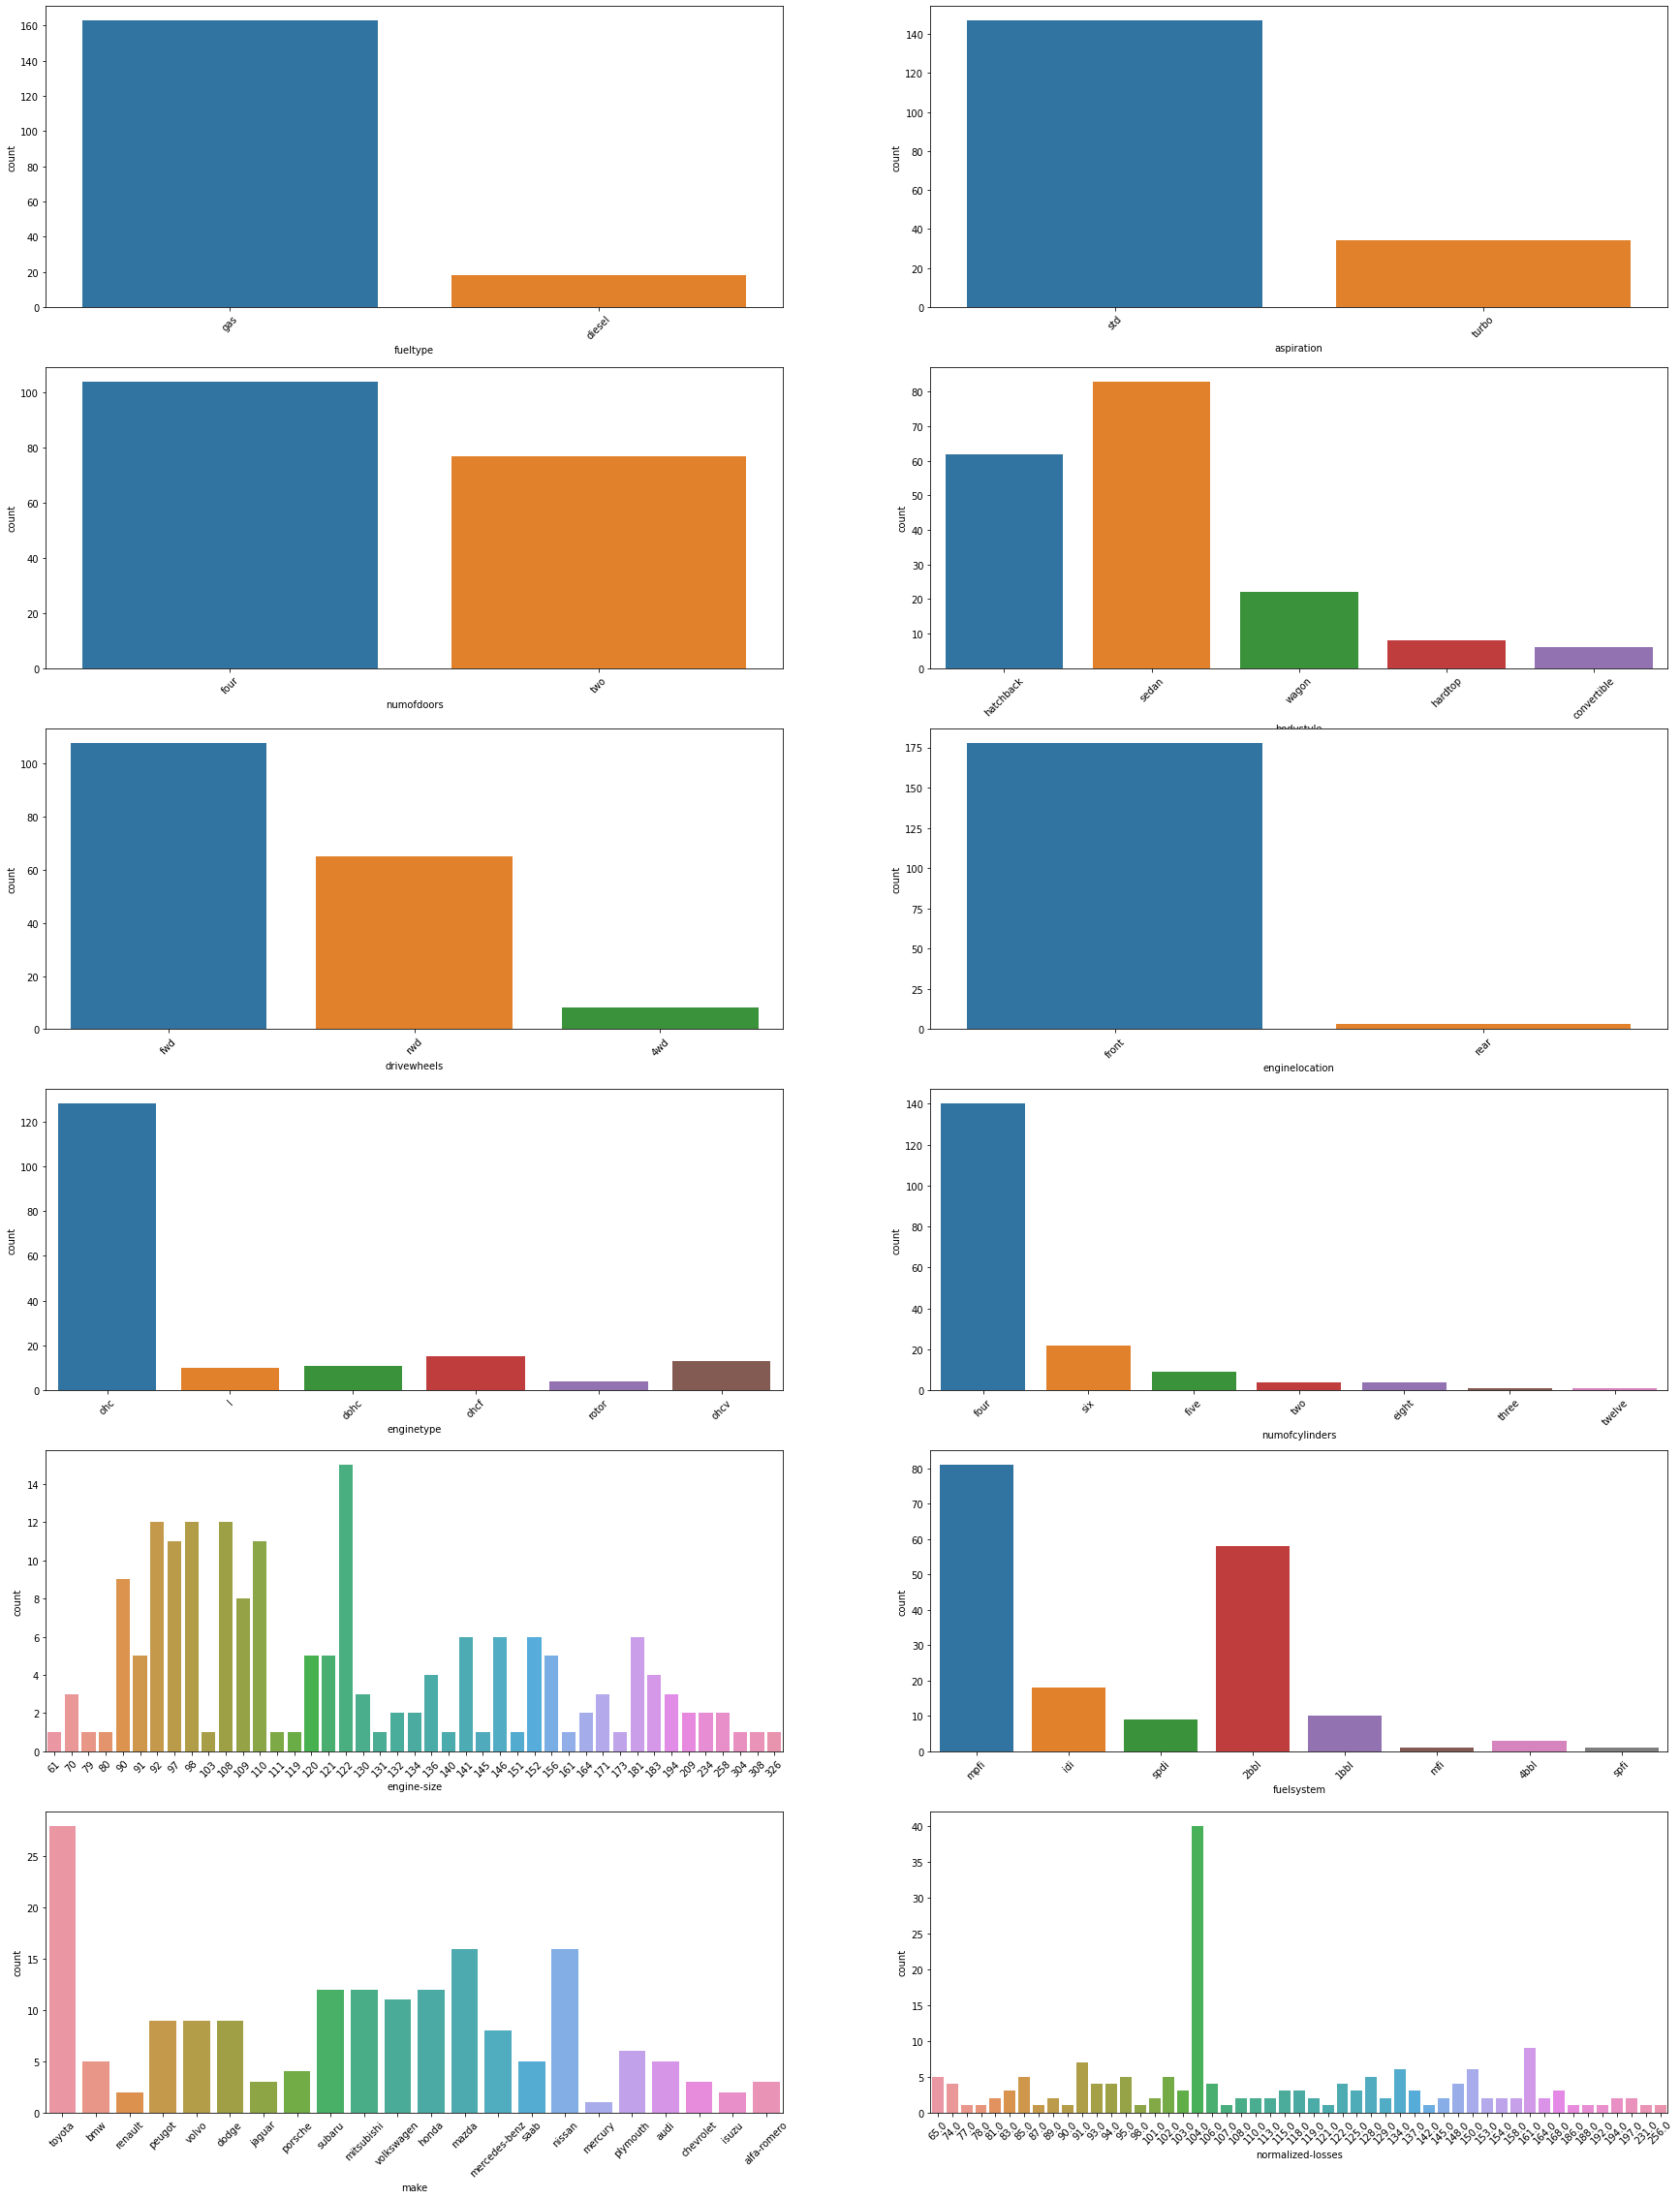

In [42]:
plt.figure(figsize=(30,40))
for i in enumerate(feature):
  plt.subplot(6,2,i[0]+1)
  sns.countplot(x=i[1],data=df1)
  plt.xticks(rotation=45)

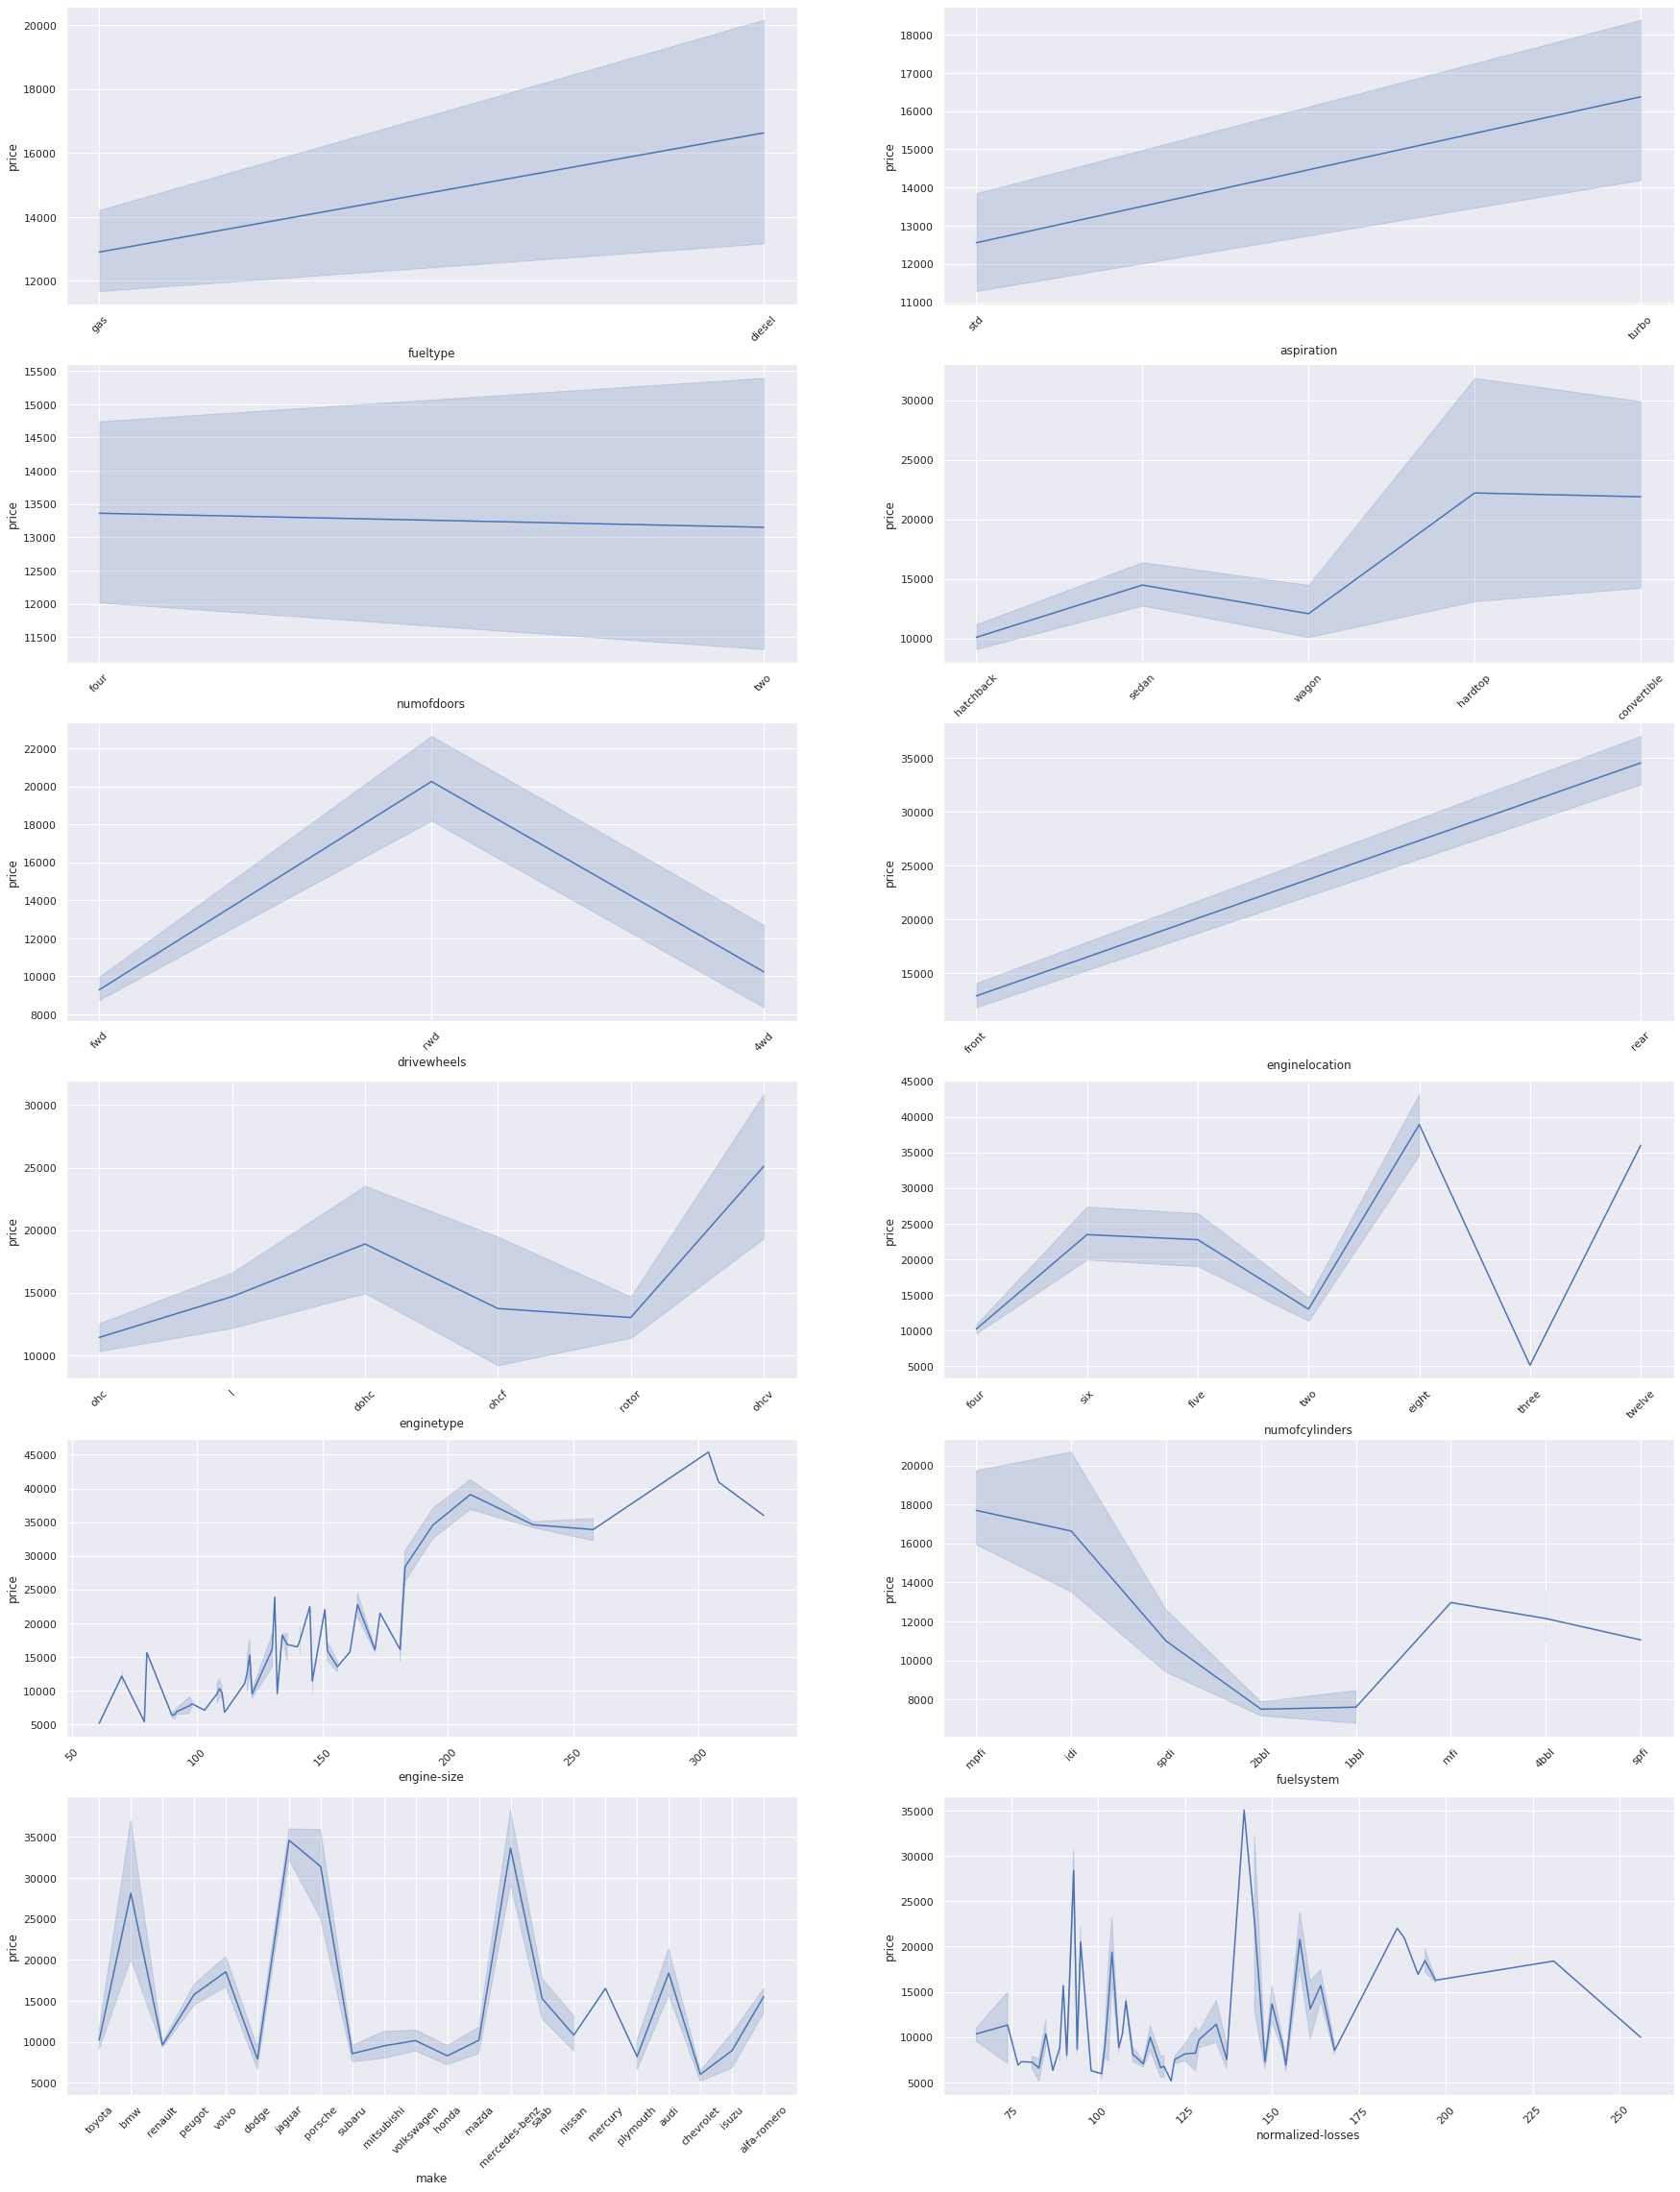

In [87]:
plt.figure(figsize=(30,40))
for i in enumerate(feature):
  plt.subplot(6,2,i[0]+1)
  sns.lineplot(x=i[1],data=df1,y=df1['price'])
  plt.xticks(rotation=45)

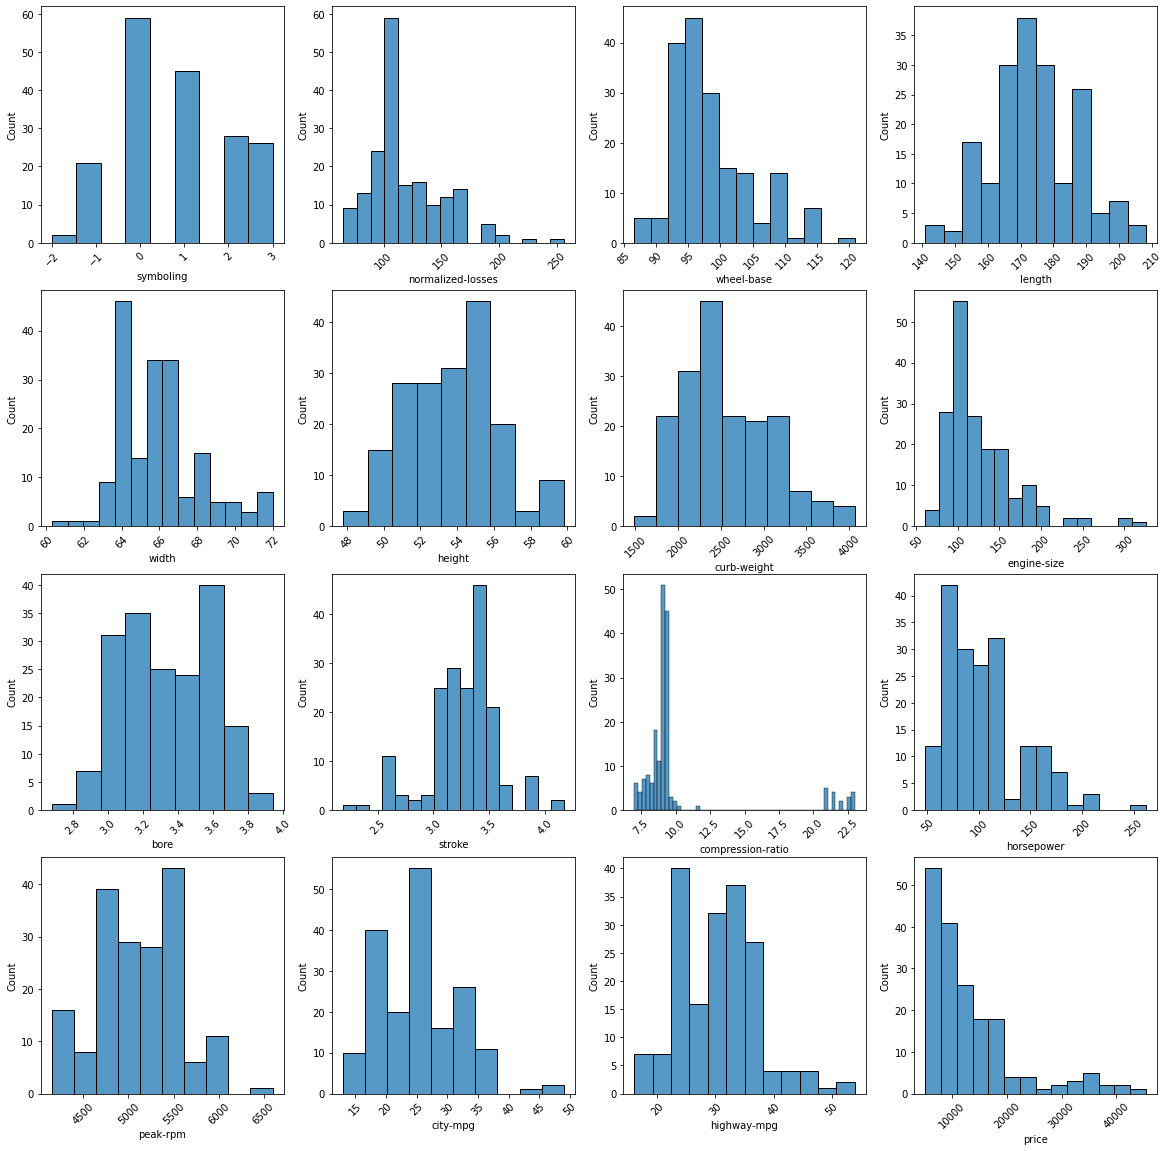

In [44]:
plt.figure(figsize=(20,20))
for i in enumerate(feature_1):
  plt.subplot(4,4,i[0]+1)
  sns.histplot(x=i[1],data=df1)
  plt.xticks(rotation=45)

# **Bivariate analysis**

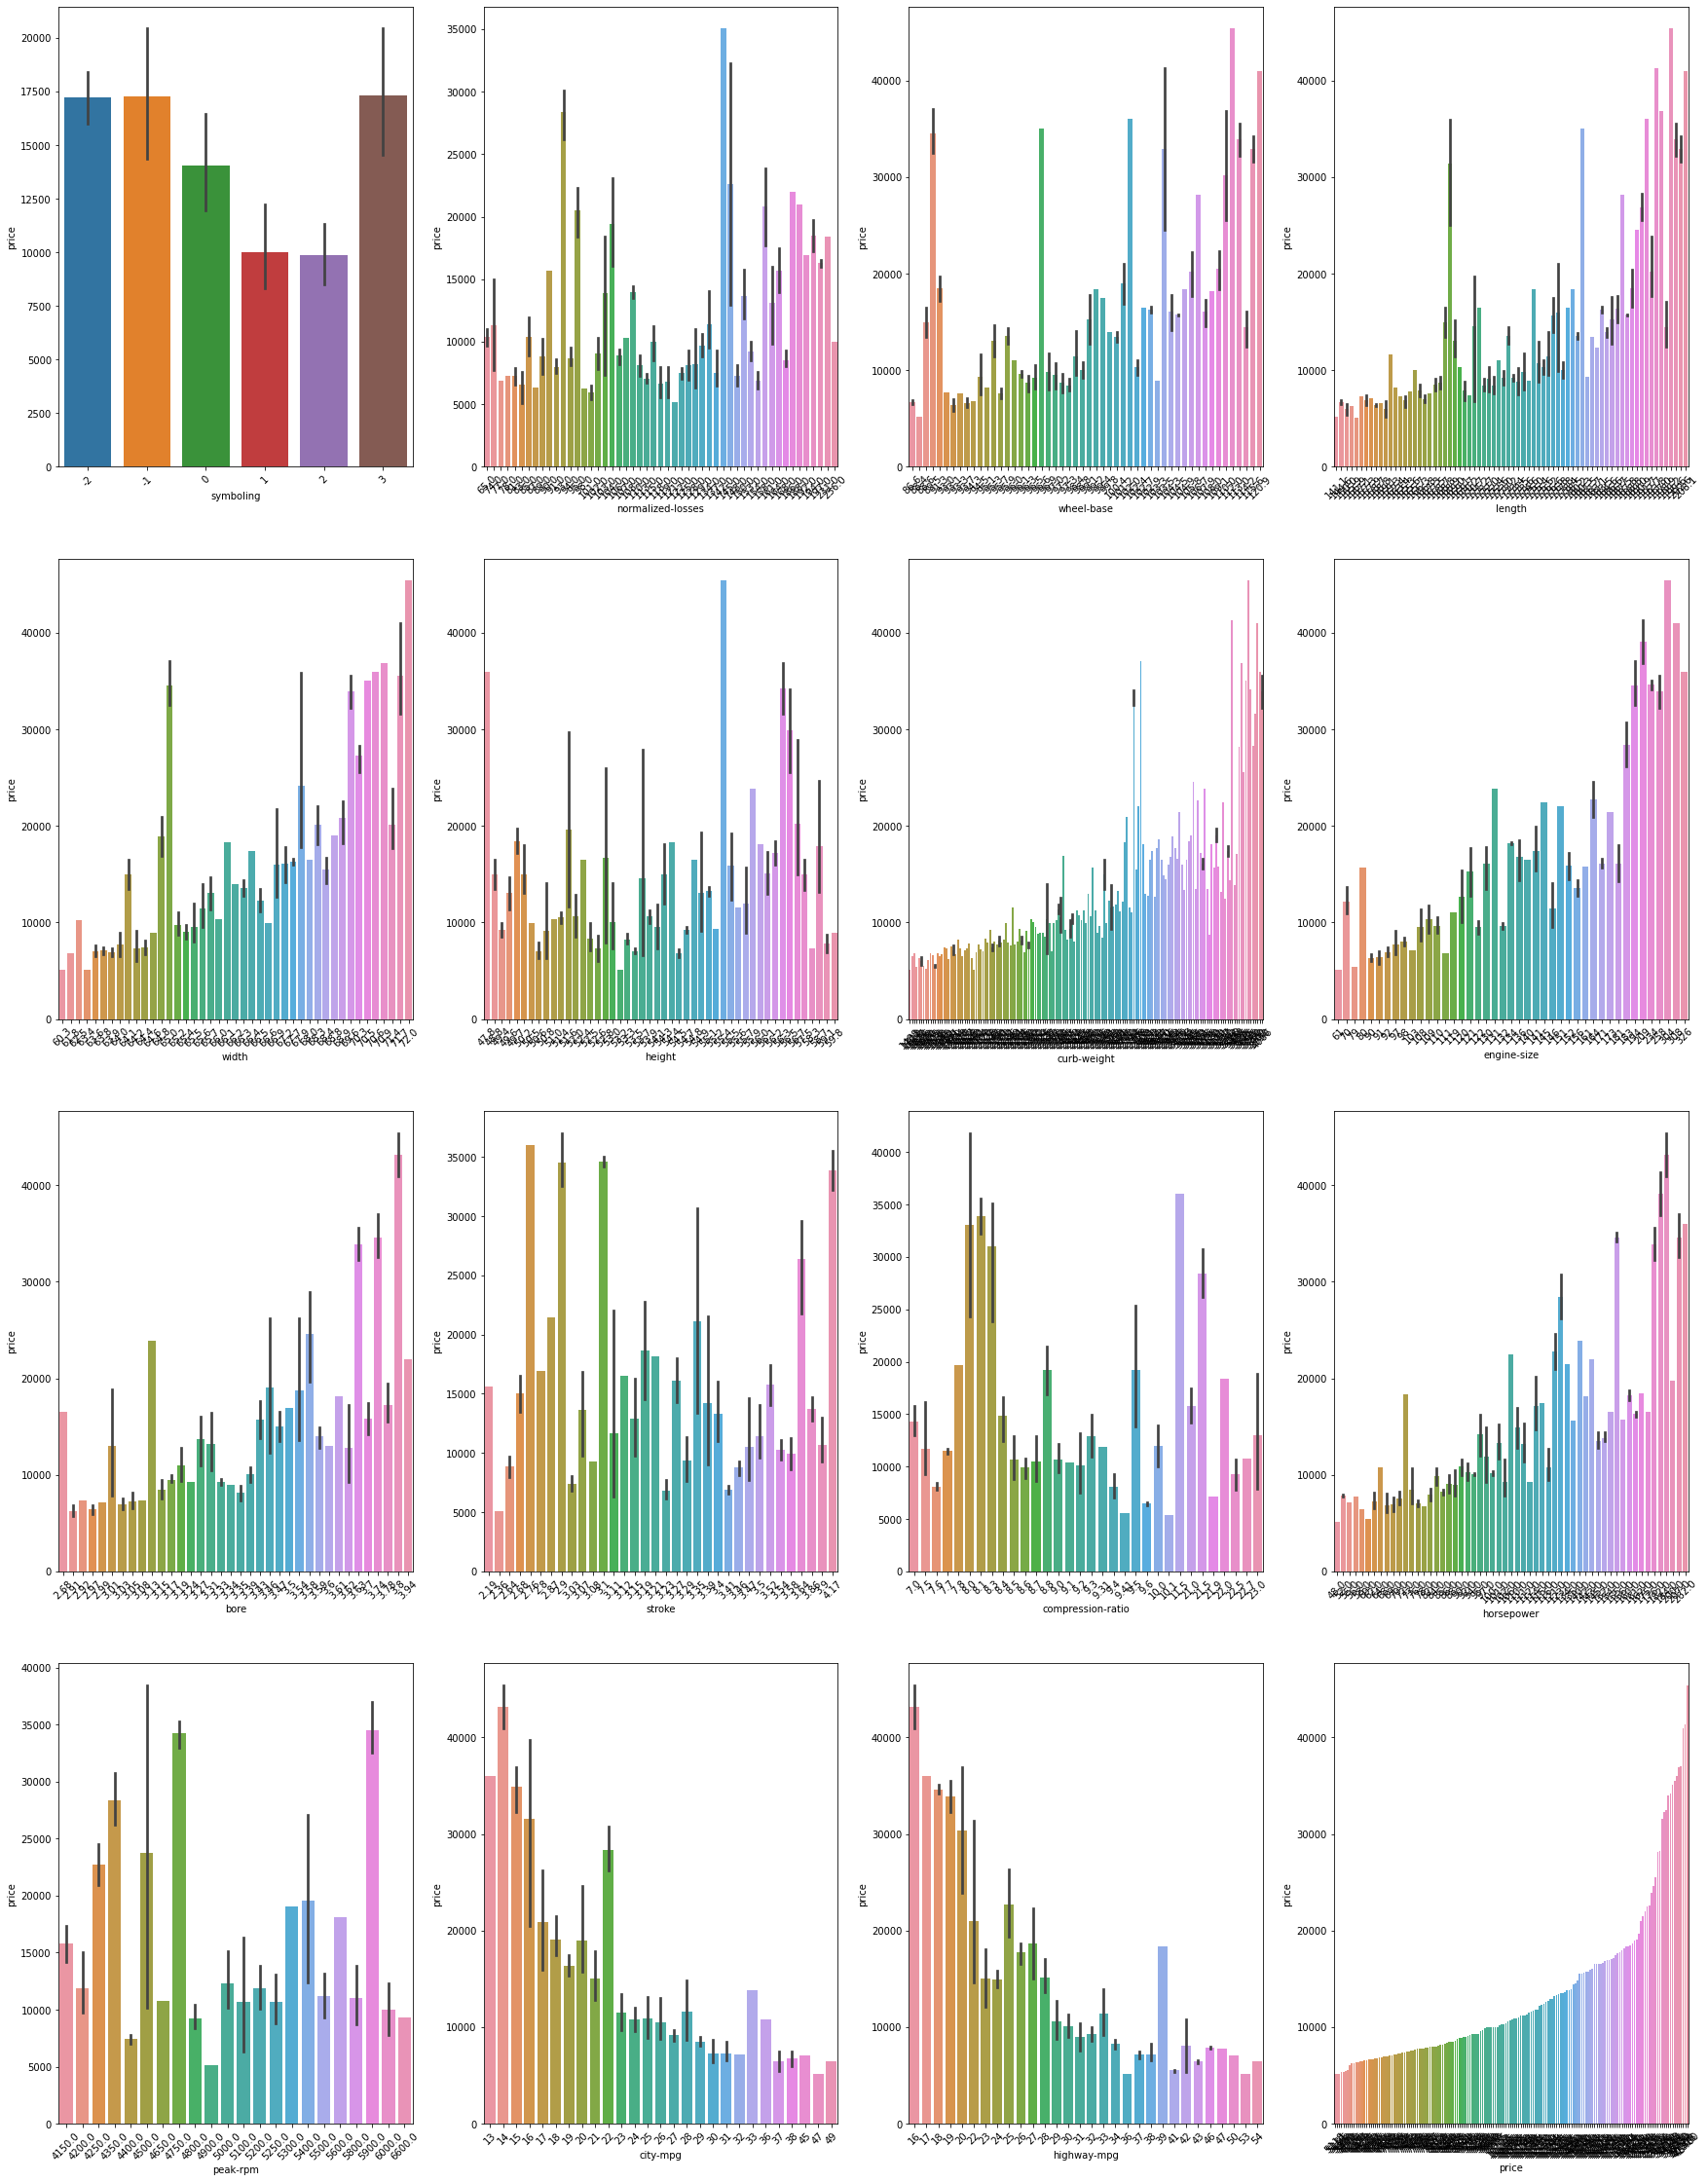

In [45]:
plt.figure(figsize=(30,40))
for i in enumerate(feature_1):
  plt.subplot(4,4,i[0]+1)
  sns.barplot(y=df1['price'],x=i[1],data=df1)
  plt.xticks(rotation=45)

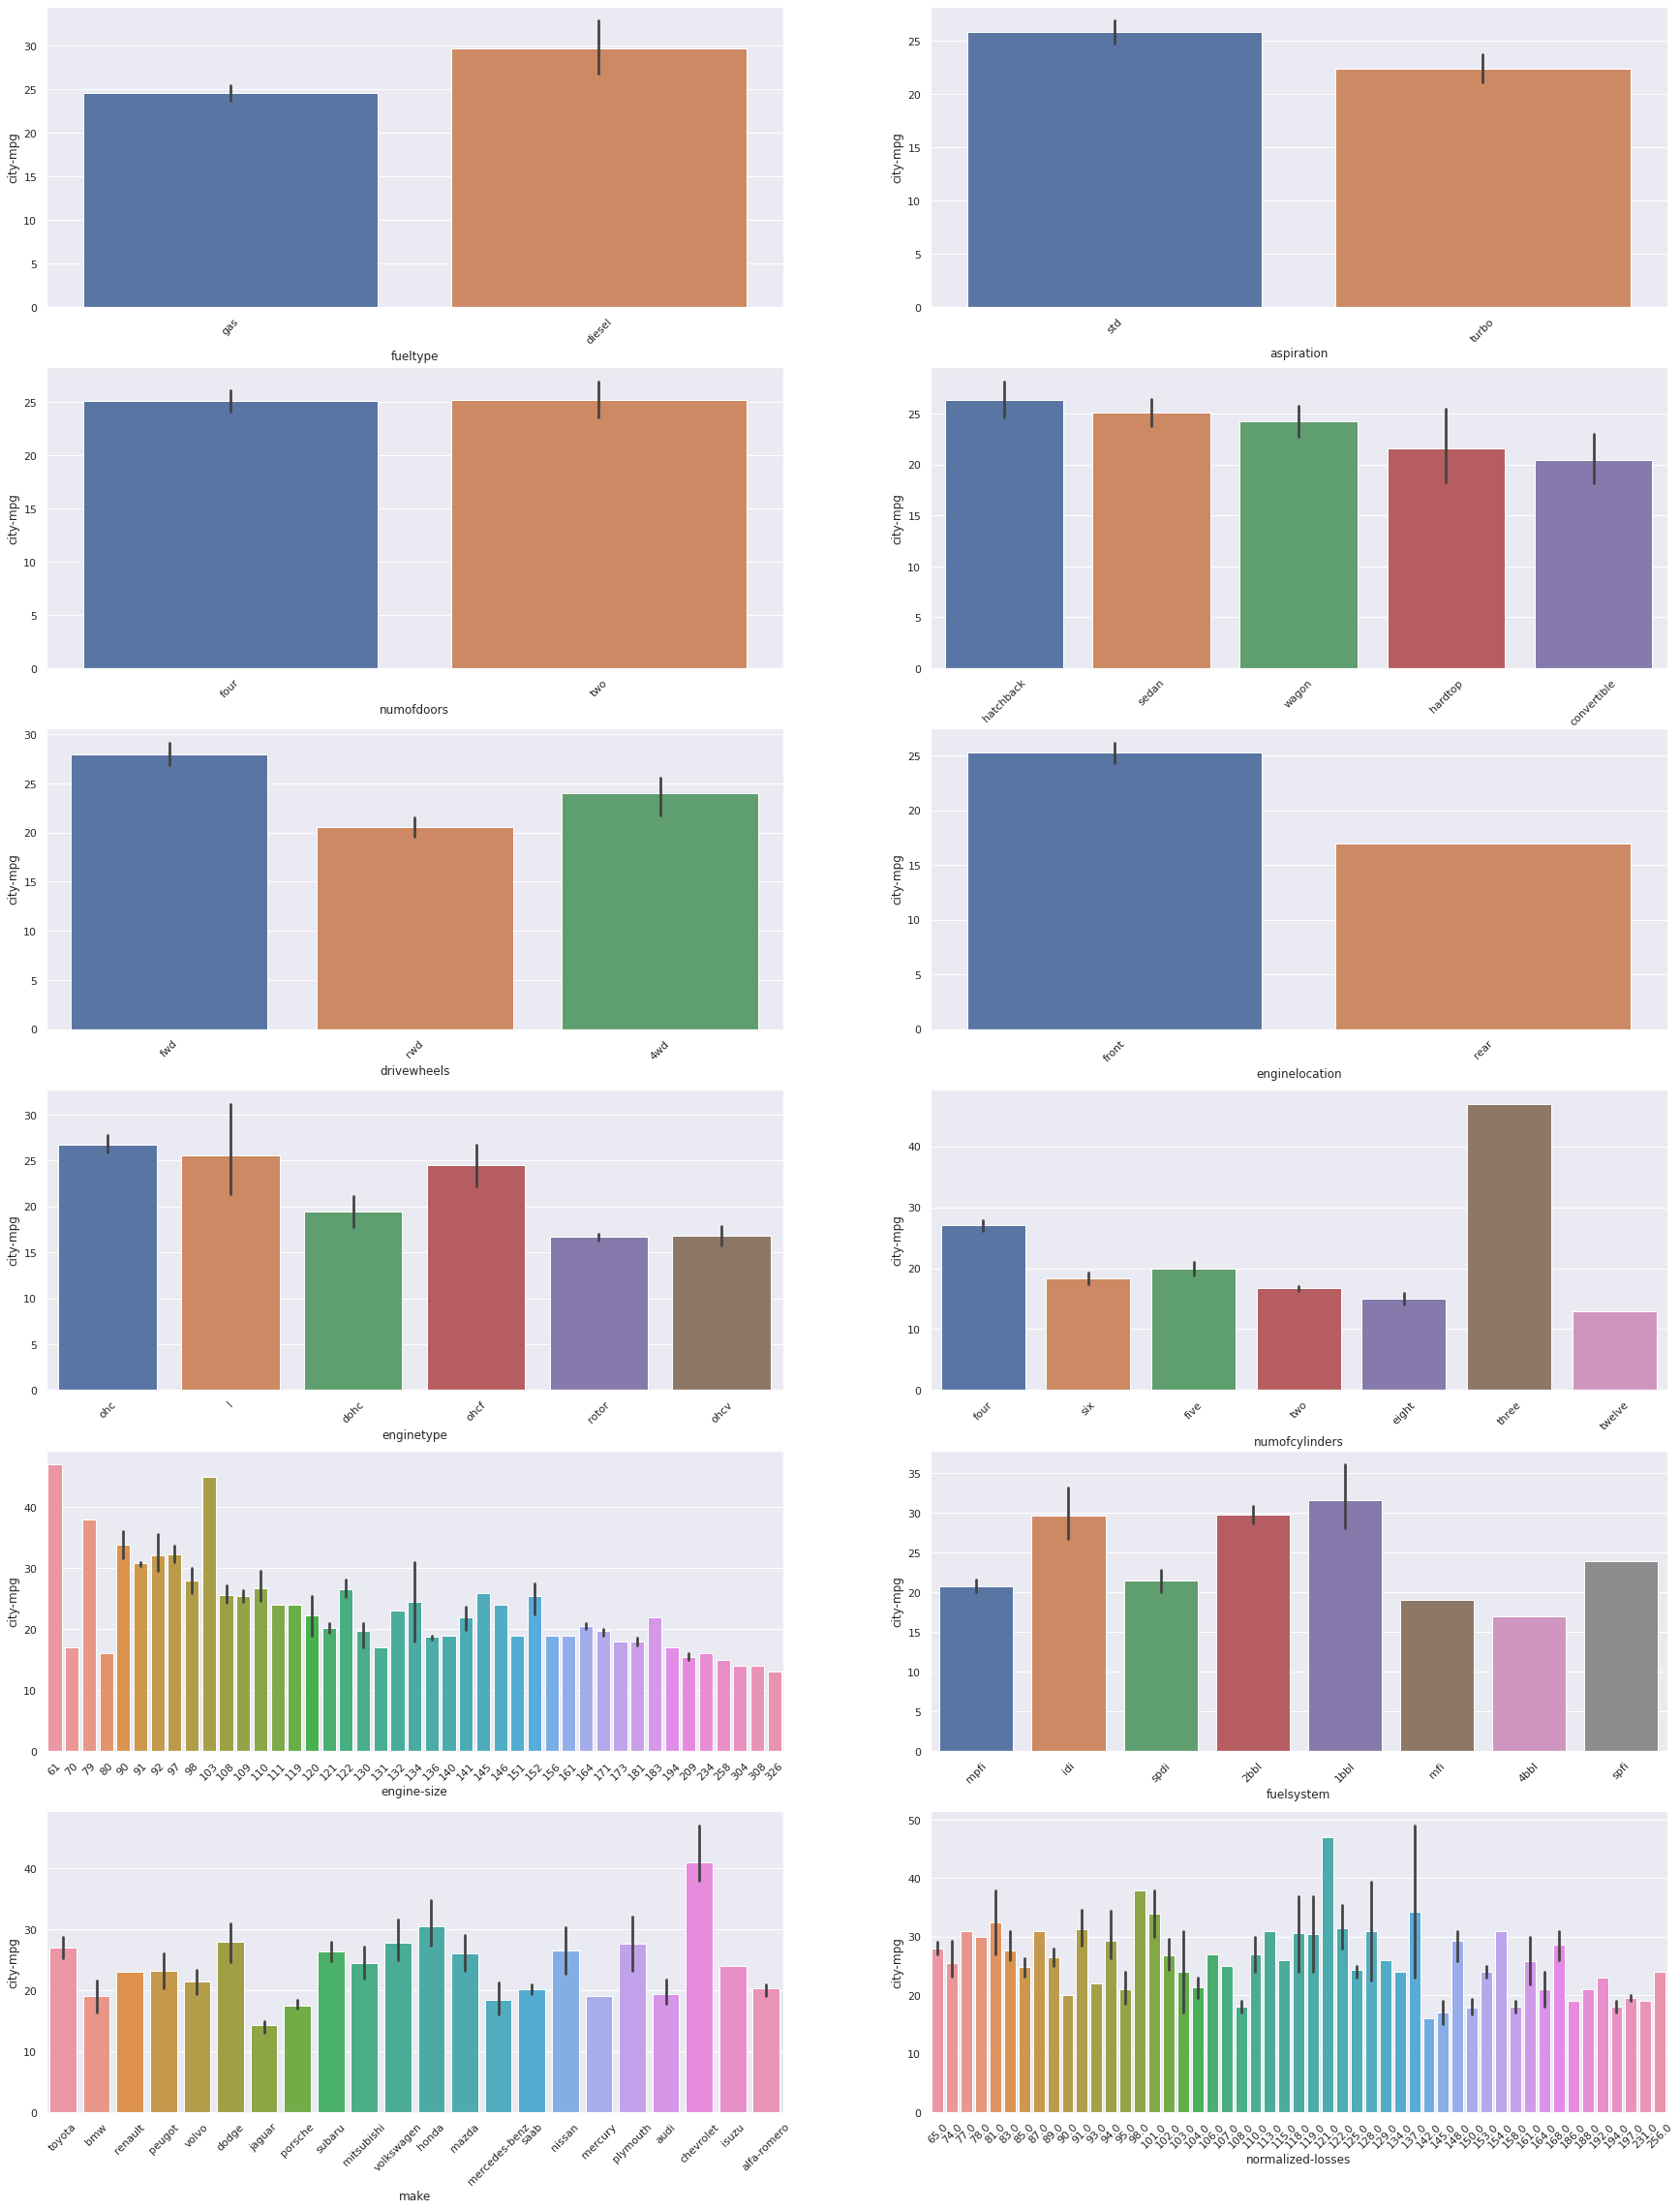

In [46]:
plt.figure(figsize=(30,40))
sns.set(font_scale=1)
for i in enumerate(feature):
  plt.subplot(6,2,i[0]+1)
  sns.barplot(y=df1['city-mpg'],x=i[1],data=df1)
  plt.xticks(rotation=45)
 


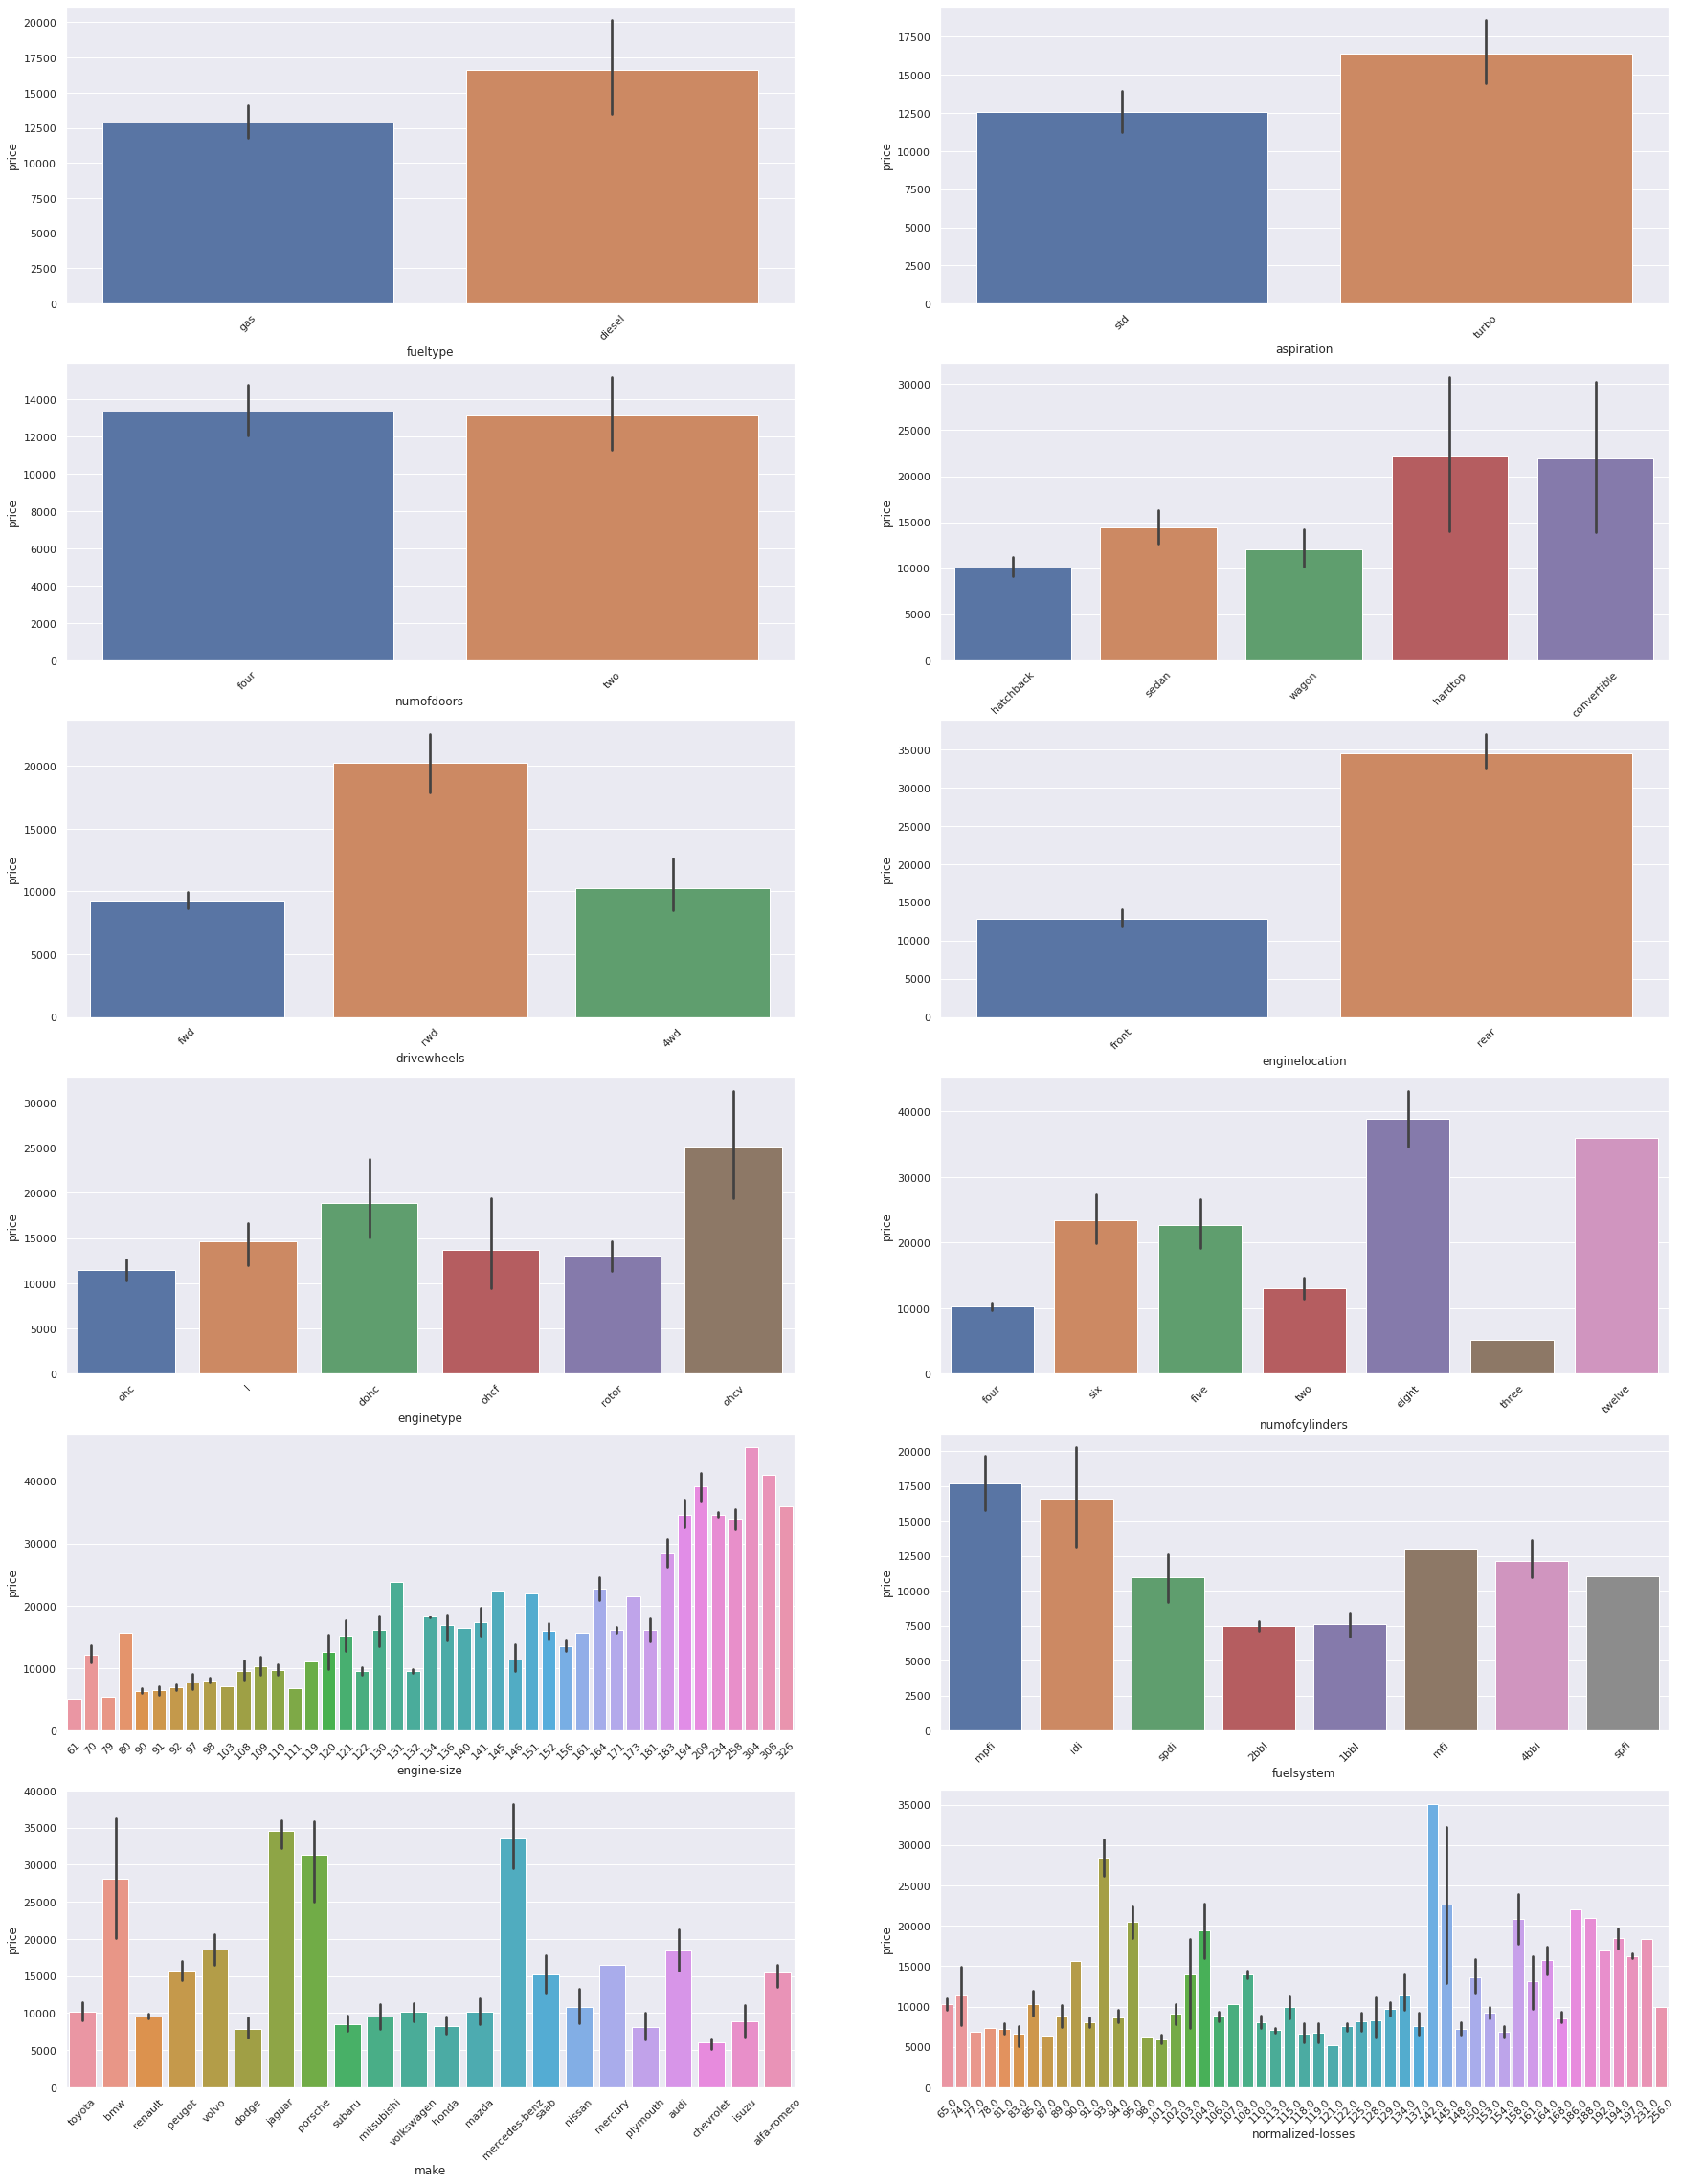

In [54]:
plt.figure(figsize=(30,40))
for i in enumerate(feature):
  plt.subplot(6,2,i[0]+1)
  sns.barplot(y=df1['price'],x=i[1],data=df1)
  plt.xticks(rotation=45)

In [47]:
x=['price','city-mpg',
 'highway-mpg','horsepower']

<Figure size 1080x576 with 0 Axes>

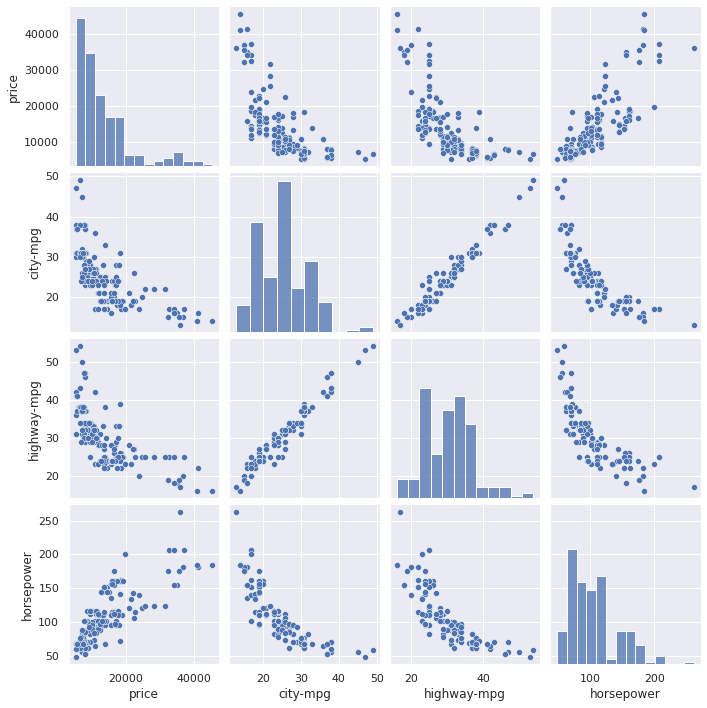

In [48]:
plt.figure(figsize=[15,8])
sns.pairplot(df1,x_vars=x,y_vars=x)

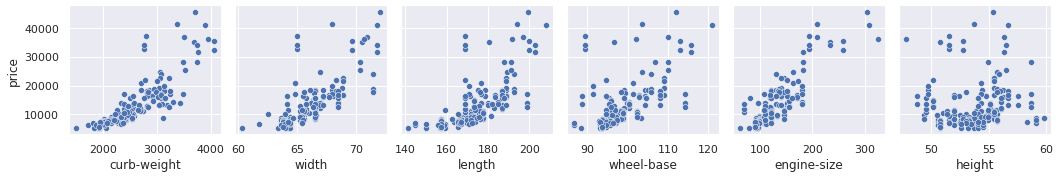

In [49]:
x_vars=['curb-weight','width','length','wheel-base','engine-size','height']
y_vars=['price']
sns.pairplot(df1,x_vars=x_vars,y_vars=y_vars)

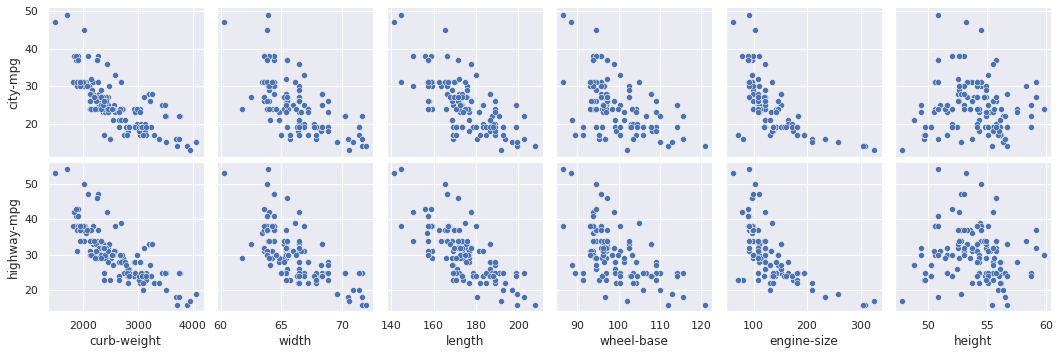

In [50]:
x_vars=['curb-weight','width','length','wheel-base','engine-size','height']
y_vars=['city-mpg','highway-mpg']
sns.pairplot(df1,x_vars=x_vars,y_vars=y_vars)

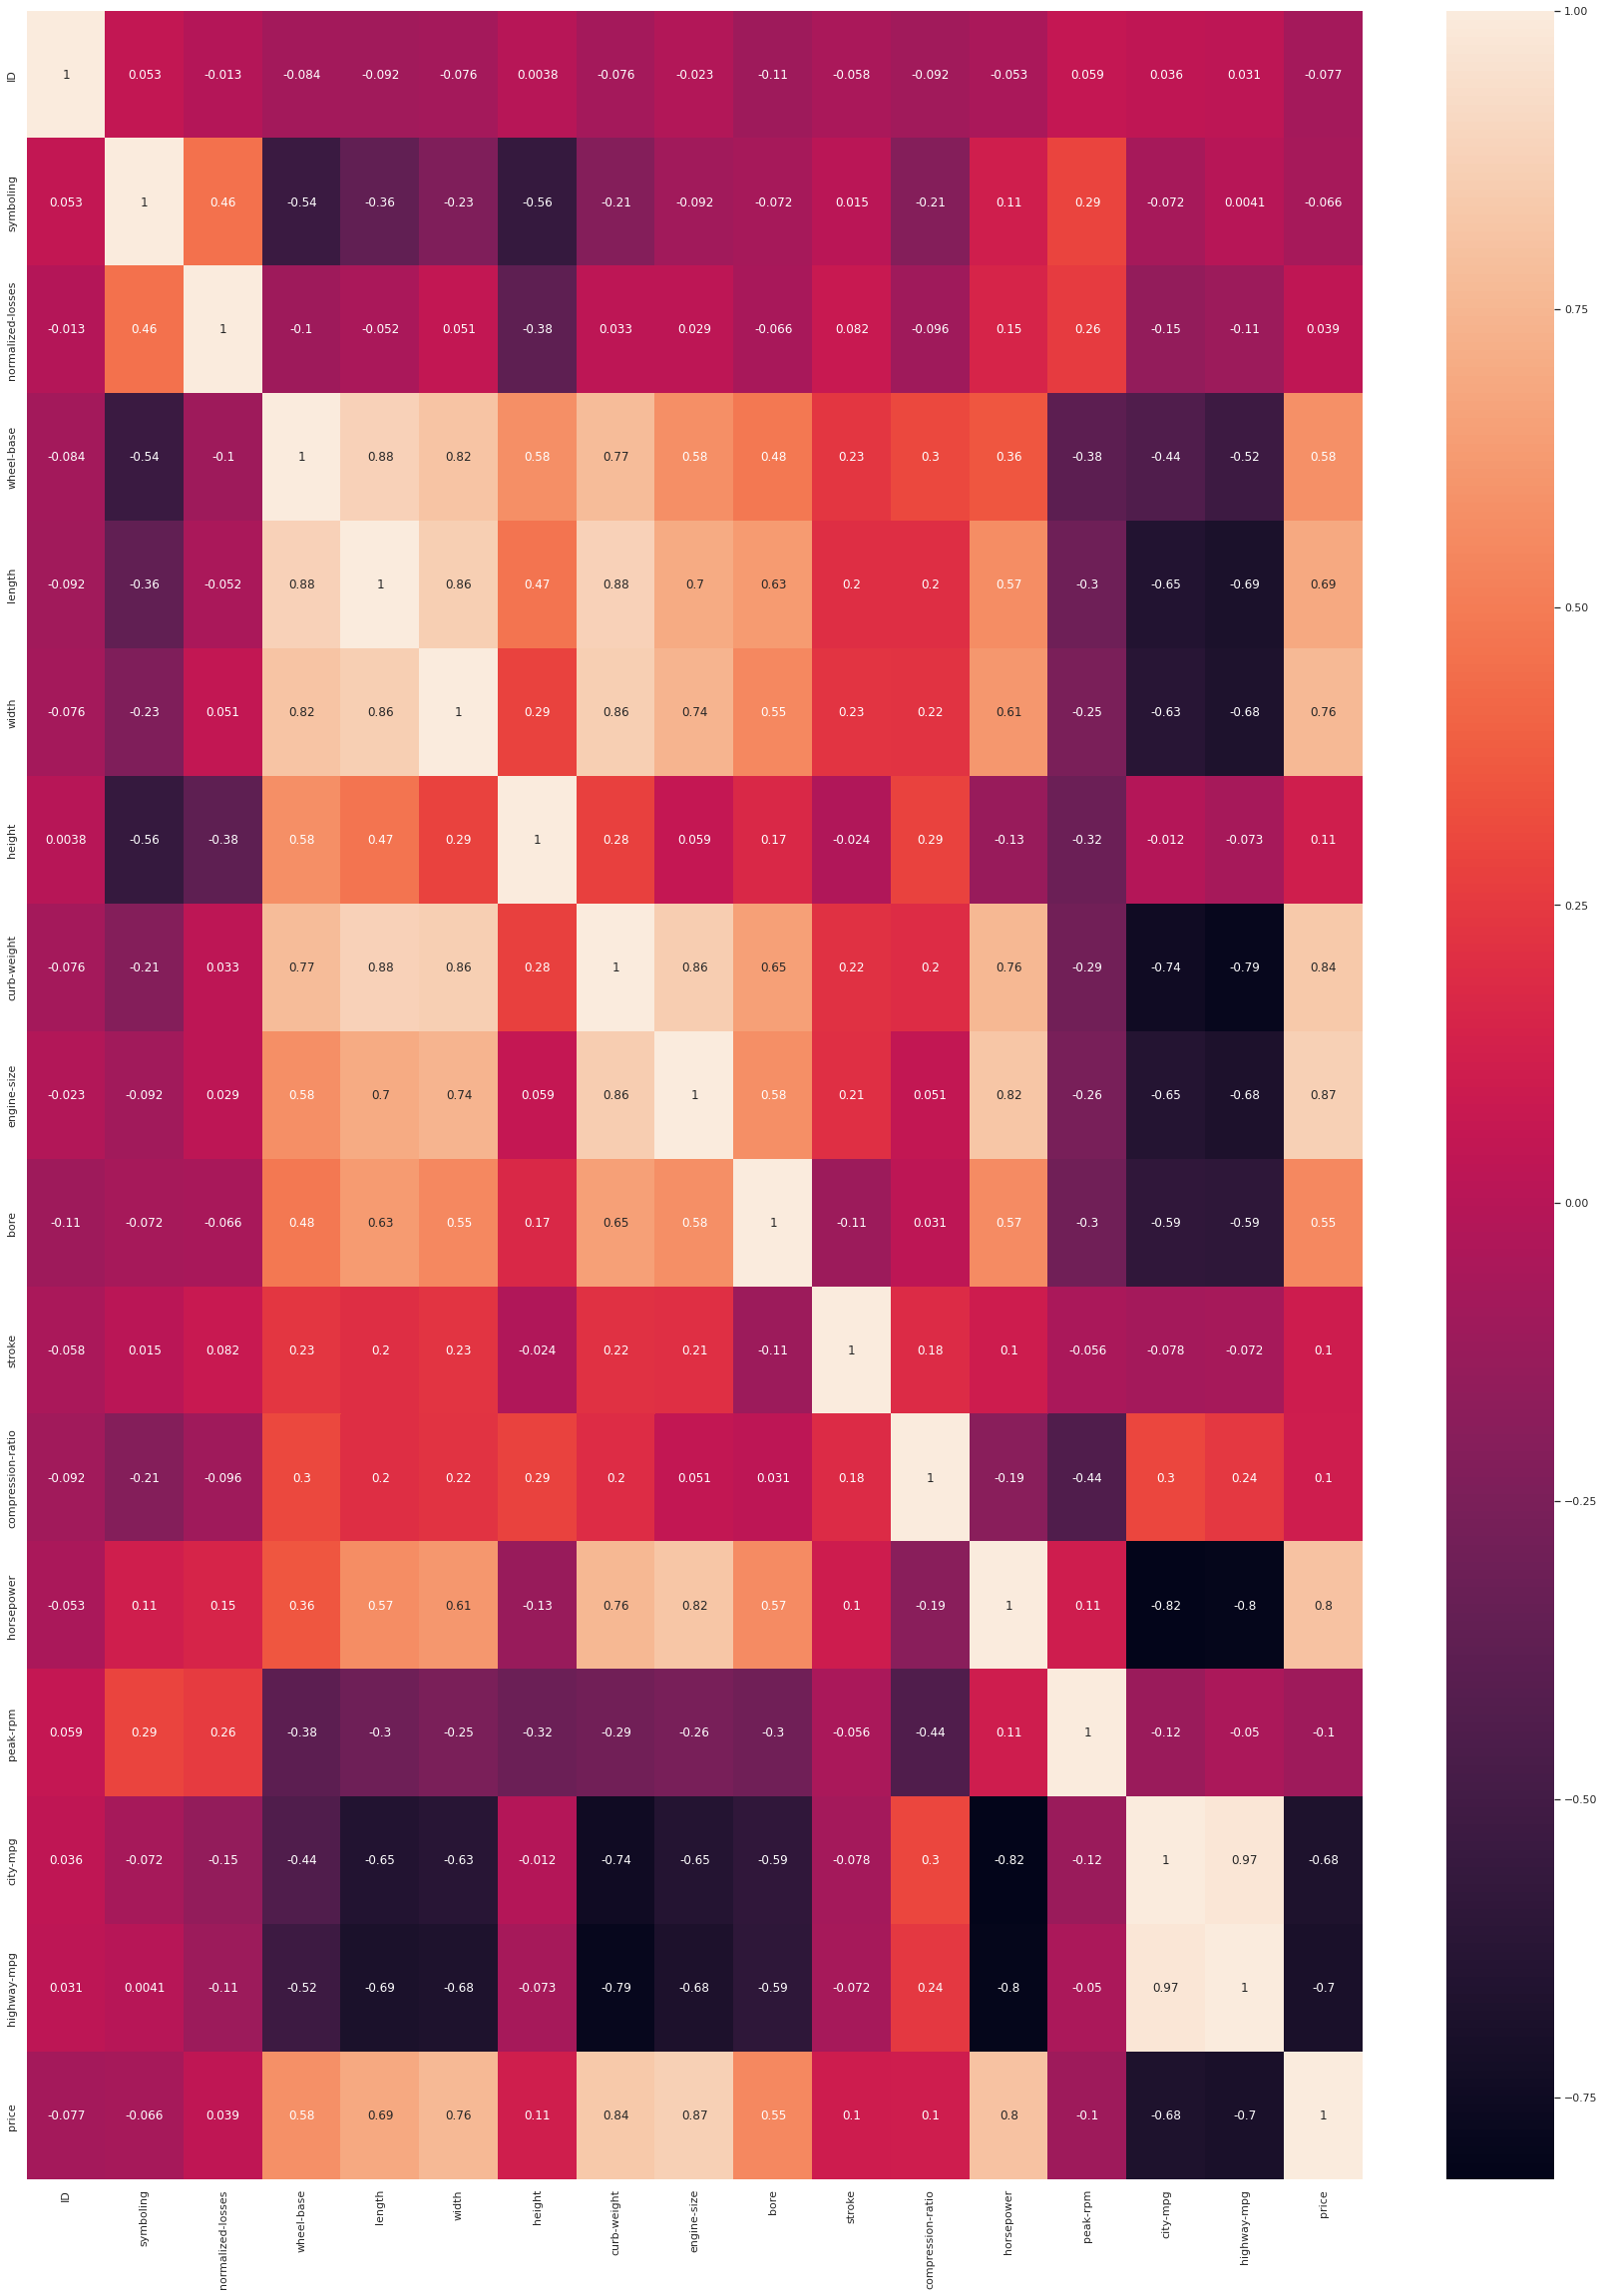

In [55]:
plt.figure(figsize=[30,40])
sns.heatmap(df1.corr(), annot=True);

---
<a name = Section9></a>
# **9. Summarization**
---

<a name = Section91></a>

### **9.1 Inferences from Univariate analysis of dataset:**

1.   Toyota has the highest number of cars overall, followed by nissan and mazda.
2.   Gas is seen as a more common fuel than diesel.

3.   Standard aspiration and four doors are more common compared to turbo aspiration and two doors.

4.   Body style sedan is the highest followed by hatchbacks and the least among the group are convertibles.

5.   Fwd drive wheels are more common than the other(rwd,4wd).

6.   Front engine location is found more than rear location which is very less compared to the former.












### **9.2 Inferences from Bivariate analysis:**

1.   Price and horsepower are directly proportional to each other where as city and highway mpg are inversely proportional to both price and horsepower.

1.   Gas-fuelled cars are lesser in price where as diesel fuelled cars have more price and more mileage than the former.

1.   Standard aspiration cars are less in price compared to turbo and also standard aspiration cars tend to provide more mileage.

1.   Hatchback and sedan body styles are lesser in price compared to other styles and also provide more mileage than other body styles.

1.   Forward Drive wheels are less in price and tend to provide more mileage compared to other drive wheels.

1.   Front located engine cars have lesser price compared to rear location and also tend to give more mileage.

1.   Engine type 'dohcv' is costlier where as 'ohc' an 'l' are least pricey comparatively and also provide more city and highway mpg.

1.   Twelve cylinder engine cars are more costly followed by eight and six cylinder engines.Three cylinder engine cars are the least pricey and provide more mileage as well.

1.   As engine size increases, price increase and city and highway mpg decreases.





#10.**ML Modelling**


###**10.1 Data Preparation**

In [53]:
df1.columns

Index(['ID', 'symboling', 'normalized-losses', 'make', 'fueltype',
       'aspiration', 'numofdoors', 'bodystyle', 'drivewheels',
       'enginelocation', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'enginetype', 'numofcylinders', 'engine-size',
       'fuelsystem', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [56]:
numeric_cols=['wheel-base','length','width','curb-weight','engine-size','bore','horsepower','city-mpg','highway-mpg']
categorical_cols=[]
print(len(numeric_cols))
print(len(categorical_cols))



9
0


In [57]:
xcols=numeric_cols+categorical_cols
len(xcols)

9

--- We split the data into dependent and independent variables.

In [58]:
#feature_cols=xcols
feature_cols=[ 'length', 'width','curb-weight','engine-size','horsepower', 'city-mpg','highway-mpg']
X=df1[feature_cols]
X.head()

,length,width,curb-weight,engine-size,horsepower,city-mpg,highway-mpg
0,175.6,66.5,2458,122,92.0,27,32
1,176.8,64.8,2710,164,121.0,21,28
2,181.5,66.5,2579,132,95.0,23,31
3,186.7,68.4,3197,152,95.0,28,33
4,188.8,67.2,2935,141,114.0,24,28


In [59]:
#symboling_dummies = pd.get_dummies(X.symboling, prefix='symboling')
#X=pd.concat([X,symboling_dummies],axis=1)
#X=X.drop(['symboling'],axis=1)
#X.columns

In [60]:
y=df1.price
print('independent shape :',X.shape)
print('dependent shape :',y.shape)

independent shape : (181, 7)
dependent shape : (181,)


In [61]:
from sklearn.model_selection import train_test_split
def split(X,y):
  return train_test_split(X,y,test_size=0.10,random_state=1)

X_train,X_test,y_train,y_test=split(X,y)

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
scaler = StandardScaler().fit(X_test)
X_test = scaler.transform(X_test)



In [63]:
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (162, 7)
y_train shape:  (162,)

Test cases as below
X_test shape:  (19, 7)
y_test shape:  (19,)


###**10.2 Model training and testing**

In [64]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X_train,y_train)
print('intercept :',linreg.intercept_)
print('coefficients :',linreg.coef_)

intercept : 13102.59259259259
coefficients : [-600.82292919 1628.23413284 1955.27161814 2674.67103146 2272.44262001
 -498.607071   1015.70321148]


In [65]:
feature_cols.insert(0,'Intercept')
coef = linreg.coef_.tolist()            
coef.insert(0, linreg.intercept_)

In [66]:
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept 13102.59259259259
length -600.8229291882272
width 1628.2341328415973
curb-weight 1955.2716181417381
engine-size 2674.671031455775
horsepower 2272.4426200056896
city-mpg -498.60707099793103
highway-mpg 1015.7032114787007


In [67]:
y_pred_train = linreg.predict(X_train) 
y_pred_test = linreg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Predicted values')

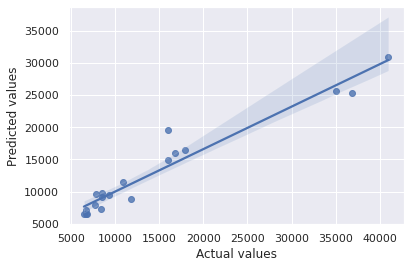

In [68]:
sns.regplot(y_test,y_pred_test)
plt.xlabel(xlabel='Actual values')
plt.ylabel(ylabel='Predicted values')

###**10.3 Model evaluation**

In [69]:
from sklearn import metrics

In [75]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 3525.850257787762
RMSE for test set is 4314.132395285868


In [76]:
feature_cols=[ 'length', 'width','curb-weight','engine-size','horsepower', 'city-mpg','highway-mpg']
Xtest=df2[feature_cols]
Xtest.shape

(20, 7)

In [77]:
scaler = StandardScaler().fit(Xtest)
Xtest = scaler.transform(Xtest)

In [78]:
price_df2=linreg.predict(Xtest)

In [79]:
price_df2

array([19208.1590829 , 19408.58799322, 22046.92987582,  5901.88710193,
        6512.33327965,  9734.05214053, 18157.14892933, 17572.05213659,
        6968.39540544,  7008.67585225, 15739.69324021,  6237.46705439,
        7335.69246235,  5725.78387082, 16153.41702244, 30751.08653945,
       10056.92679832, 17982.31832965, 11292.70427994,  8258.54045662])

In [80]:
submission=pd.DataFrame()


In [81]:
df2.columns

Index(['ID', 'symboling', 'normalized-losses', 'make', 'fuel-type',
       'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size',
       'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg'],
      dtype='object')

In [82]:
submission=df2.drop(['symboling', 'normalized-losses', 'make', 'fuel-type',
       'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size',
       'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg'],axis=1)

In [83]:
submission['predicted price']=price_df2

In [84]:
submission.head()

,ID,predicted price
0,1,19208.159083
1,2,19408.587993
2,3,22046.929876
3,4,5901.887102
4,5,6512.333280


In [90]:
submission.to_csv('submissionfile.csv',index=False,header=False)
from google.colab import files
files.download('submissionfile.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>